## Sanjay Santokee - sanjay.santokee@my.uwi.edu


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pylab inline
import numpy as np 
import math

Populating the interactive namespace from numpy and matplotlib


In [3]:
class Particle(object):
    def __init__(self, n, low=-50, high=50):
        super().__init__()
        self.state = np.random.uniform(low=low, high=high, size=n)
        self.best_state = np.copy(self.state)
        self.velocity = np.zeros_like(self.state)
        self.best_score = -10000000
    
    def compute_velocity(self, inertia_factor, global_best):
        exploitation = np.random.random() * (self.best_state - self.state)
        exploration = np.random.random() * (global_best.state - self.state)
        inertia = inertia_factor * self.velocity
        self.velocity = inertia + exploration + exploitation
    
    def apply_velocity_update(self):
        self.state = self.state + self.velocity
        
    def compute_fitness(self, fitness_func):
        fitness = fitness_func(self.state)
        if self.best_score < fitness:
            self.best_score = fitness
            self.best_state = self.state
        return fitness

#### Penalty Function with Quadratic Loss

In [4]:
def compute_penalty(x, y):   
    # Quadratic Loss
    penalty = (np.maximum(0, ((x + 5)**2) + ((y + 5)**2) - 25))**2
    
    return penalty

### Fitness Function

In [5]:
def fitness(state):
    x = state[0]
    y = state[1]
    
    # Optimization Problem
    f = (math.sin(y) * math.e**((1 - math.cos(x))**2)) + (math.cos(y) * math.e**((1 - math.sin(x))**2)) - ((x - y)**2)
    
    # Making it into a maximization problem
    f *= -1
    
    # Exploitation factor, Exploration factor
    r= 1
    
    # Computing Penalty with Quadratic Loss
    penalty = compute_penalty(x, y)
    
    T = f - penalty * r
    
    return T

#### Setting up Paramaters

In [6]:
n = 2
num_particles = 1000
num_iterations = 1000
inertia_factor = 0.3 # Decreasing → does randomly. Increasing → uses history and might get stuck.
global_best = np.zeros(n)
global_best_fitness = -1000000000

In [7]:
particles = [Particle(n) for _ in range(num_particles)]
convergence_curve = []

In [8]:
for i in range(num_iterations):
    for p in particles:
        # Computing Fitness
        fitness_of_p = p.compute_fitness(fitness)
        # Assessing Global best score
        if fitness_of_p > global_best_fitness:
            global_best_fitness = fitness_of_p
            global_best = p
    for p in particles:
        # Computing Velocity of Particles
        p.compute_velocity(inertia_factor, global_best)
    for p in particles:
        # Applying Velocity
        p.apply_velocity_update()
    convergence_curve.append(global_best_fitness)

In [9]:
global_best.best_state

array([-1.65703529, -8.99504415])

In [10]:
global_best.best_score

99.54243223681118

#### Results

Global Best State : (-1.65703529, -8.99504415)

The Global best score found is 99.54243223681118.

#### Plotting The Convergence Curve

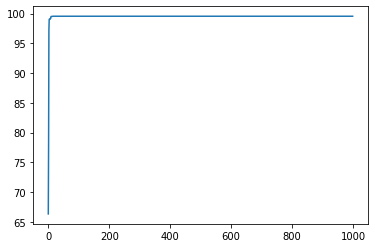

In [11]:
plot(list(range(len(convergence_curve))), convergence_curve)

***
#### References

Bruno Seixas Gomes de Almeida, Victor Coppo Leite. 2019. "Particle Swarm Optimization: A Powerful Technique for Solving Engineering Problems."

Mykel J. Kochenderfer, Tim A. Wheeler. 2019. Algorithms for Optimization. Cambridge, Massachusetts: The MIT Press.
